In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])
example_df

,above_three,even,value
a,False,False,1
b,False,False,3
c,False,True,2
d,True,True,4
e,False,False,1
f,True,True,6
g,True,True,4


In [4]:

# groupby() without as_index
if True:
    first_even = example_df.groupby('even').first()
    print (first_even)
    print (first_even['even']) # Causes an error. 'even' is no longer a column in the DataFrame

       above_three  value
even                     
False        False      1
True         False      2


KeyError: 'even'

In [8]:
if True:
    first_even = example_df.groupby('even', as_index=False).first()
    print (first_even)
    print('')
    print (first_even['even']) # Now 'even' is still a column in the DataFrame


    even  above_three  value
0  False        False      1
1   True        False      2

0    False
1     True
Name: even, dtype: bool


In [9]:
filename = 'nyc-subway-weather.csv'
subway_df = pd.read_csv(filename)

## Make a plot of your choice here showing something interesting about the subway data.
## Matplotlib documentation here: http://matplotlib.org/api/pyplot_api.html
## Once you've got something you're happy with, share it on the forums!
#scatterplot with lat and longitude as x and y and ridership as bubble size

In [11]:
subway_df.head(5)

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [24]:
s = subway_df.groupby('UNIT')[['ENTRIESn_hourly','EXITSn', 'DATEn','day_week','rain']]

In [ ]:
d = subway_df.groupby('UNIT')[['rain', '']]


In [18]:
location_data  = subway_df.groupby(['longitude','latitude'], as_index = False).mean()
# mean is added to  find teh mean ridership for each loication
# as index False will keep the alongi and lati as a coulmn as well

In [17]:
location_data.head()

,,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,fog,precipi,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
longitude,latitude,,,,,,,,,,,,,,,,,,,
-74.073622,40.643738,1.062626e+07,9.479254e+04,1803.623656,0.026882,10.000000,2.935484,0.709677,0.010753,0.006183,29.973118,0.225806,63.394086,5.531720,0.006183,29.973118,63.394086,5.531720,40.708031,-74.014870
-74.030964,40.616624,1.504886e+07,1.218917e+07,837.173913,568.565217,10.021739,2.934783,0.706522,0.010870,0.006250,29.972826,0.222826,63.457609,5.541304,0.006250,29.972826,63.457609,5.541304,40.635826,-73.960793
-74.028368,40.622715,3.210196e+07,2.581894e+07,1674.880435,1130.288043,10.043478,2.913043,0.711957,0.010870,0.006250,29.972500,0.228261,63.453804,5.560326,0.006250,29.972500,63.453804,5.560326,40.635826,-73.960793
-74.025514,40.629702,1.666844e+07,1.159073e+07,822.532934,435.568862,10.107784,2.910180,0.724551,0.005988,0.006048,29.970539,0.227545,63.514970,5.559281,0.006048,29.970539,63.514970,5.559281,40.635826,-73.960793
-74.023411,40.634945,2.325863e+07,1.767213e+07,1265.073034,705.398876,10.089888,2.898876,0.713483,0.011236,0.006461,29.971910,0.230337,63.420787,5.598876,0.006461,29.971910,63.420787,5.598876,40.689018,-73.996338


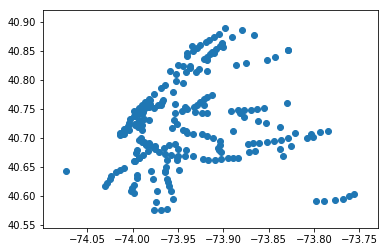

In [20]:
plt.scatter(location_data['longitude'],location_data['latitude'])

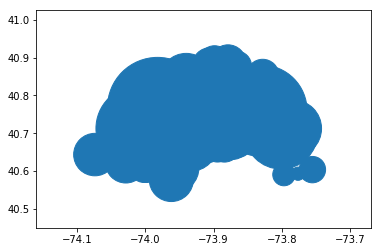

In [21]:
# to determine size of bubble
plt.scatter(location_data['longitude'],location_data['latitude'],s = location_data['ENTRIESn_hourly'])

In [22]:
# scale the entries to make size appropriate
scaled = location_data['ENTRIESn_hourly']/location_data['ENTRIESn_hourly'].std()

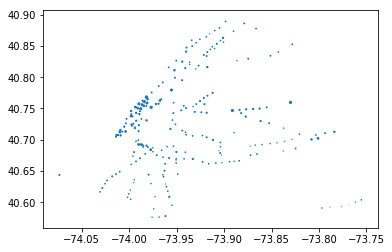

In [23]:
plt.scatter(location_data['longitude'],location_data['latitude'],s = scaled)